In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp
import sys
sys.path.append("../../utils/")
from plot_utils import get_colors
from plotting import get_value_from_folder, get_ave_value_from_multiple_seed, running_mean, get_curve_best

### utilities for txt filebased training monitoring data

In [31]:
colors_dict = get_colors()

In [32]:
general_folder = "/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat"
baseline_general_folder = "/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat"

In [33]:
def get_ave_value_from_multiple_seed(folder_name_template, exclude_template, file_name, general_folder, preprocessor):
    # exclude template is used to exclude certain patterns
    subdirs = [x[0] for x in os.walk(general_folder)]
    results = []
    for subdir in subdirs:
        is_target = True
        for temp in folder_name_template:
            if temp not in subdir:
                is_target = False
                break
#             print subdir
        for temp in exclude_template:
            if temp in subdir:
                is_target = False
                break
        if is_target:
            print subdir
            results.append(get_value_from_folder(subdir, file_name) )
            if preprocessor is not None:
                results[-1] = preprocessor(results[-1] )
    ave = results[0]
    cnt = 1
    for res in results[1:]:
        try:
            ave += res
            cnt += 1
        except:
            pass
#         print res
    ave /= float(cnt)
#     print len(results)
    return ave

### fp sgd visualization

### lr 1.0

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_2


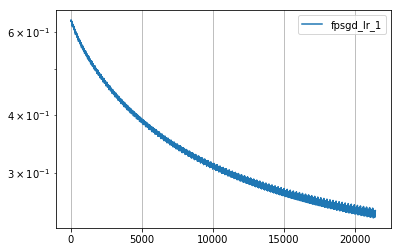

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_1_seed_2


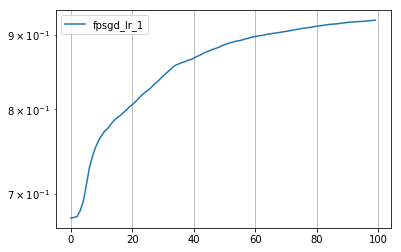

In [34]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_1"
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed([folder_name_pre,], ["lr_10"], file_name, baseline_general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_1"
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed([folder_name_pre,], ["lr_10"], file_name, baseline_general_folder, preprocessor=None) )
# print curve_list[-1]
plt.semilogy(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_4
/dfs/scratch0/zjian/lp_kernel/codr

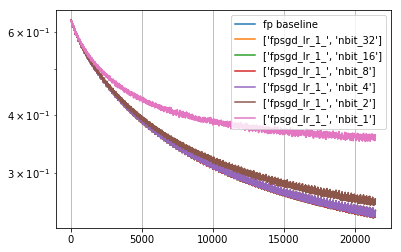

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_1_seed_1_feat_nbit_4
/dfs/scratch0/zjian/lp_kernel/codr

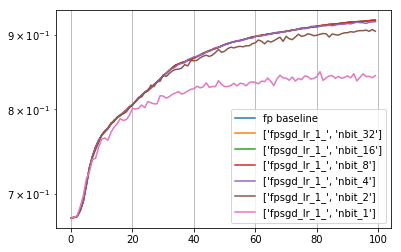

In [35]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_1_", "nbit_" + str(nbit) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                      exclude_template, file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_1_", "nbit_" + str(nbit) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                     exclude_template, file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)

#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lr 2.5

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_2


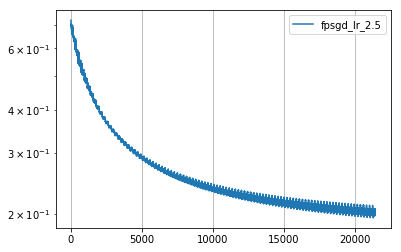

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_2


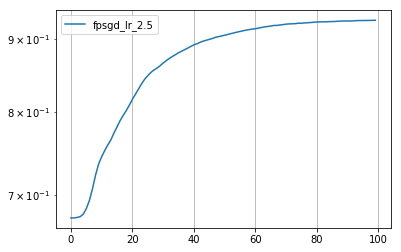

In [36]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_2.5"
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_2.5"
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor=None) )
# print curve_list[-1]
plt.semilogy(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_4
/dfs/scratch0/

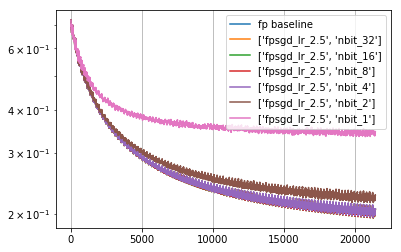

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_2.5_seed_2_feat_nbit_4
/dfs/scratch0/

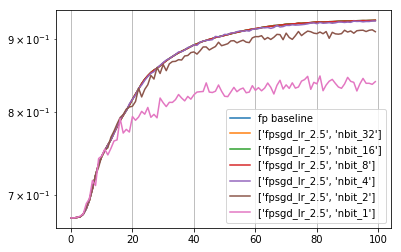

In [37]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_2.5", "nbit_" + str(nbit) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                      exclude_template, file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_2.5", "nbit_" + str(nbit) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                     exclude_template, file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)

#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lr 5

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_1


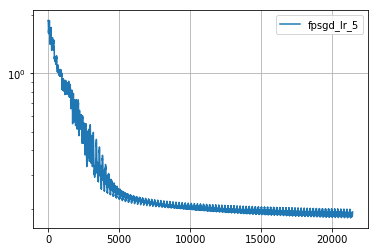

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_5_seed_1


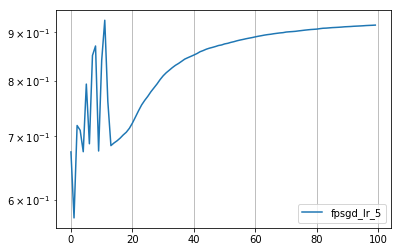

In [39]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_5"
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_5"
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor=None) )
# print curve_list[-1]
plt.semilogy(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_kernel/codr

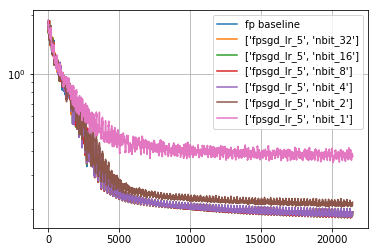

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_5_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_kernel/codr

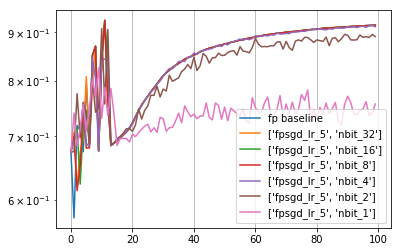

In [40]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_5", "nbit_" + str(nbit) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                      exclude_template, file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_5", "nbit_" + str(nbit) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                     exclude_template, file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)

#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lr 10.0

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_3


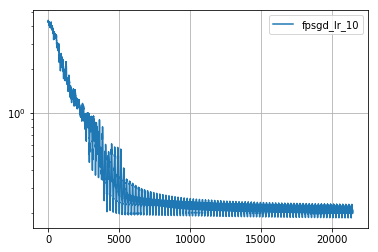

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_10_seed_3


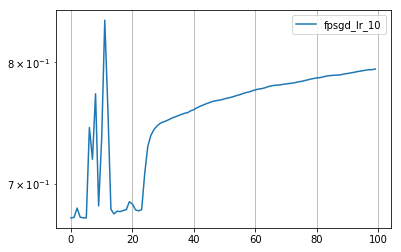

In [41]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_10"
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_10"
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor=None) )
# print curve_list[-1]
plt.semilogy(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_k

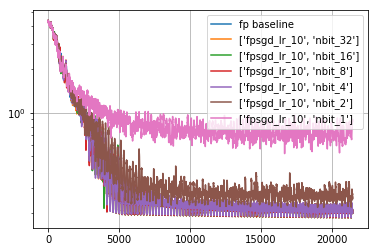

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_10_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_k

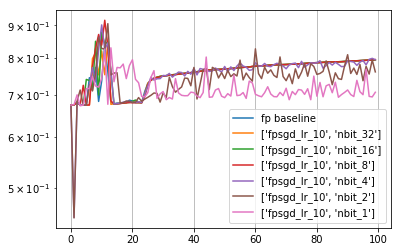

In [42]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_10", "nbit_" + str(nbit) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                      exclude_template, file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_10", "nbit_" + str(nbit) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                     exclude_template, file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)

#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lr 25

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_3


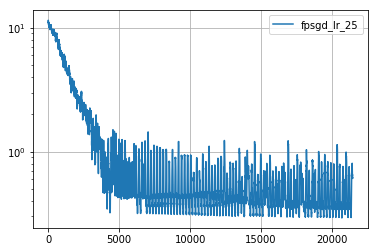

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_3


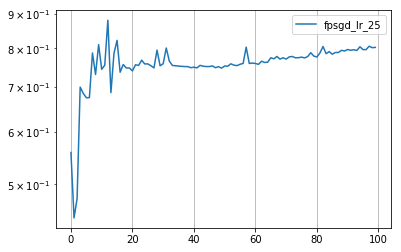

In [43]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_25"
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = "fpsgd_lr_25"
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed([folder_name_pre,], [], file_name, baseline_general_folder, preprocessor=None) )
# print curve_list[-1]
plt.semilogy(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_k

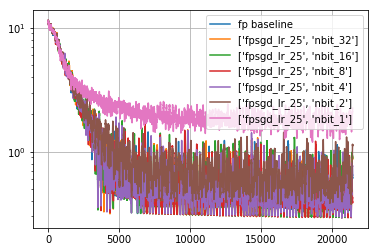

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_32
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_16
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_1_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_3_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_8
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_fp_model_lp_feat/fpsgd_lr_25_seed_2_feat_nbit_4
/dfs/scratch0/zjian/lp_k

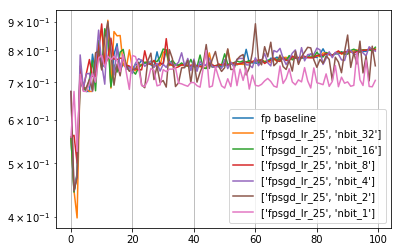

In [44]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_25", "nbit_" + str(nbit) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                      exclude_template, file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for nbit in [32, 16, 8, 4, 2, 1]:
    if nbit == 1:
        exclude_template = ["nbit_16", ]
    else:
        exclude_template = []
    folder_name_pre = ["fpsgd_lr_25", "nbit_" + str(nbit) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, 
                     exclude_template, file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)

#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()